# 1. Loading data and setting up tensorflow

In [19]:
!pip install tensorflow opencv-python matplotlib
# !pip install tensorflow-gpu

## 1.1 checking if the required dependencies have been installed

In [20]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.2.2
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy          

In [21]:
import tensorflow as tf
import os

In [30]:
## this code will show the presence of any usable gpus
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

**add gpu code if any over here**

## 1.2 removing bad images

In [57]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [62]:
## this code just assigns variables to make the code more readable
data_directory = 'data'
data_categories = os.listdir(data_directory)
image_extensions = ['png', 'jpg', 'jpeg', 'bmp']
data_categories

['sad', 'happy']

**this code lists all the files inside the directory :** 
`os.listdir(os.path.join(data_directory, data_categories[0]))`

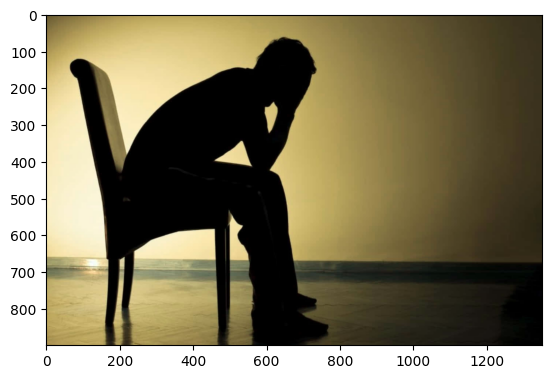

In [66]:
img = cv2.imread(os.path.join(data_directory, data_categories[0], 'alone-sad-pictures-1351-x-900-rnu5n35710aytlpc.jpg'))
img.shape
plt.imshow(img)

In [67]:
for image_class in data_categories :
    for image in os.listdir(os.path.join(data_directory, image_class)) :
        image_path = os.path.join(data_directory, image_class, image)
        try :
            img = cv2.imread(image_path) # creates a numpy array
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print('image not in extension list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e :
            print('issue with image {}'.format(image_path))

[ WARN:0@8383.031] global grfmt_png.cpp:695 read_chunk chunk data is too large
libpng warning: iCCP: known incorrect sRGB profile


## 1.3 loading the data into a dataset

In [69]:
## tf.data.Dataset??

In [70]:
import numpy as np

In [71]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 269 files belonging to 2 classes.
